2025-04-11 16:56:51.478361: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-11 16:56:52.340715: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-11 16:56:52.345295: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-04-11 16:56:54.599322: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Epoch 1/30
1050/1050 [==============================] - 27s 25ms/step - loss: 0.1747 - accuracy: 0.9455 - val_loss: 0.0638 - val_accuracy: 0.9805
Epoch 2/30
1050/1050 [==============================] - 21s 20ms/step - loss: 0.0544 - accuracy: 0.9827 - val_loss: 0.0497 - val_accuracy: 0.9844
Epoch 3/30
1050/1050 [==============================] - 21s 20ms/step - loss: 0.0366 - accuracy: 0.9881 - val_loss: 0.0498 - val_accuracy: 0.9821
Epoch 4/30
1050/1050 [==============================] - 20s 19ms/step - loss: 0.0286 - accuracy: 0.9912 - val_loss: 0.0422 - val_accuracy: 0.9862
Epoch 5/30
1050/1050 [==============================] - 19s 18ms/step - loss: 0.0221 - accuracy: 0.9925 - val_loss: 0.0361 - val_accuracy: 0.9889
Epoch 6/30
1050/1050 [==============================] - 20s 19ms/step - loss: 0.0158 - accuracy: 0.9949 - val_loss: 0.0356 - val_accuracy: 0.9893
Epoch 7/30
1050/1050 [==============================] - 20s 19ms/step - loss: 0.0122 - accuracy: 0.9962 - val_loss: 0.0412 -

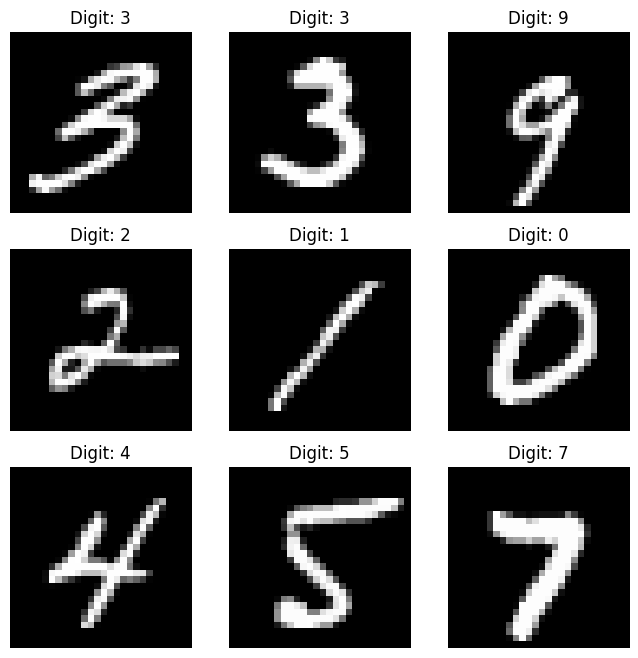

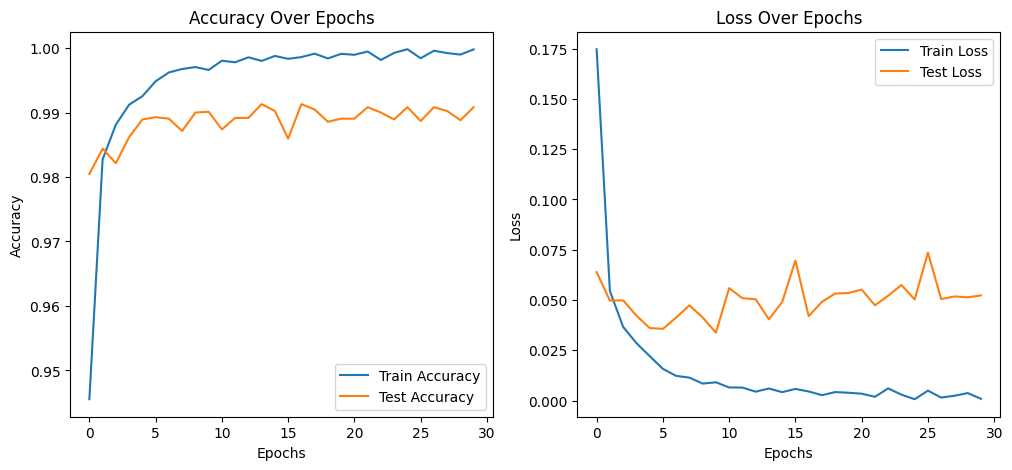

Train Accuracy: 99.99%
Train Loss: 0.0003
Test Accuracy: 99.08%
Test Loss: 0.0523


In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Load dataset
file_path = './data.csv'
data = pd.read_csv(file_path)

# Tách nhãn và dữ liệu ảnh
X = data.iloc[:, 1:].values.reshape(-1, 28, 28, 1) / 255.0  # Reshape và chuẩn hóa
Y = data.iloc[:, 0].values.reshape(-1, 1)

# One-hot encoding nhãn
encoder = OneHotEncoder(sparse_output=False)
Y = encoder.fit_transform(Y)

# Chia tập train/test theo tỷ lệ 80% train, 20% test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Xây dựng mô hình CNN
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile mô hình
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Huấn luyện mô hình
history = model.fit(X_train, Y_train, epochs=30, batch_size=32, validation_data=(X_test, Y_test))

# Đánh giá mô hình
train_loss, train_acc = model.evaluate(X_train, Y_train)
test_loss, test_acc = model.evaluate(X_test, Y_test)

# Hiển thị một số ảnh ngẫu nhiên từ tập dữ liệu kèm nhãn
indices = np.random.choice(len(X_train), 9, replace=False)  # Chọn ngẫu nhiên 9 ảnh
fig, axes = plt.subplots(3, 3, figsize=(8, 8))
axes = axes.flatten()
for i, idx in enumerate(indices):
    img = X_train[idx].reshape(28, 28)
    label_index = np.argmax(Y_train[idx])
    axes[i].imshow(img, cmap='gray')
    axes[i].axis('off')
    axes[i].set_title(f"Digit: {label_index}")
plt.show()

# Vẽ đồ thị accuracy và loss
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Over Epochs')

plt.show()

print(f"Train Accuracy: {train_acc * 100:.2f}%")
print(f"Train Loss: {train_loss:.4f}")
print(f"Test Accuracy: {test_acc * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

In [10]:
model.save("mnist_model.h5")  # Lưu mô hình